# Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the CSV file
file_path = "/Users/sjtok/ece684/suicidal_tweet_detection/Suicide_Detection.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [3]:
# Check the data types of all columns
print(df.dtypes)

Unnamed: 0     int64
text          object
class         object
dtype: object


In [4]:
df.head(10)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
5,11,Honetly idkI dont know what im even doing here...,suicide
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide
7,13,It ends tonight.I can’t do it anymore. \nI quit.,suicide
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,My life is over at 20 years oldHello all. I am...,suicide


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231992 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Unnamed: 0  231992 non-null  int64   
 1   text        231992 non-null  object  
 2   class       231992 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 5.5+ MB


# Data Preprocessing

In [5]:
# Check missing values
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [6]:
# Drop rows with missing values
df = df.dropna(subset=['text'])

In [7]:
print(df['class'].unique())

['suicide' 'non-suicide']


In [8]:
# Remove trailing space from the 'class' column
df['class'] = df['class'].str.strip()

# Verify
print(df['class'].unique())

['suicide' 'non-suicide']


In [9]:
# Converting the class column to categorical type
df['class'] = df['class'].astype('category')

In [10]:
import re

In [11]:
# # Remove mentions (i.e. @username) and URLs

# def remove_mentions_urls(tweet):
#     tweet = re.sub(r'@\w+', '', tweet) # Remove mentions (e.g., @username)
#     tweet = re.sub(r'http[s]?://\S+', '', tweet) # Remove URLs starting with http:// or https://
#     return tweet

# df['text'] = df['text'].apply(remove_mentions_urls)

# print(df[['text']].head())

In [12]:
# Function to remove mentions(i.e. @username), URLs, and emojis
def remove_mentions_urls_emojis(tweet):
    # Remove mentions (e.g., @username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove URLs starting with http:// or https://
    tweet = re.sub(r'http[s]?://\S+', '', tweet)
    # Remove emojis using the emoji regex pattern
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Symbols and Pictographs
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols for Legacy Computing
        "\U00002702-\U000027B0"  # Miscellaneous Symbols
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", re.UNICODE)
    tweet = re.sub(emoji_pattern, '', tweet)  # Remove emojis
    return tweet


df['text'] = df['text'].apply(remove_mentions_urls_emojis)
print(df[['text']].head())


                                                text
0  Ex Wife Threatening SuicideRecently I left my ...
1  Am I weird I don't get affected by compliments...
2  Finally 2020 is almost over... So I can never ...
3          i need helpjust help me im crying so hard
4  I’m so lostHello, my name is Adam (16) and I’v...


In [13]:
# Filter out rows where the tweet contains one word or less
one_word_or_less = df[df['text'].str.split().str.len() <= 1].shape[0]
print(f"Number of rows with 1 word or less: {one_word_or_less}")

df = df[df['text'].str.split().str.len() > 1]

Number of rows with 1 word or less: 82


In [14]:
# Sample 5,000 rows from each class
sampled_non_suicide = df[df['class'] == 'non-suicide'].sample(n=5000, random_state=42)
sampled_suicide = df[df['class'] == 'suicide'].sample(n=5000, random_state=42)

# Combine the two samples into a single DataFrame
balanced_sample = pd.concat([sampled_non_suicide, sampled_suicide])

# Shuffle the combined DataFrame to mix the classes
balanced_sample = balanced_sample.sample(frac=1, random_state=42)

# Exploratory Data Analysis

In [15]:
# Check class balance
class_counts = balanced_sample['class'].value_counts()
print(class_counts)

class
non-suicide    5000
suicide        5000
Name: count, dtype: int64


In [16]:
# Check if data contains special characters

def contains_special_characters(tweet):
    # Regex pattern to match non-alphanumeric characters (special characters)
    pattern = re.compile('[^A-Za-z0-9\s]', re.UNICODE)
    return bool(pattern.search(tweet))  # Return True if special character is found, False otherwise

balanced_sample['Contains_Special_Characters'] = balanced_sample['text'].apply(contains_special_characters)
special_char_count = balanced_sample['Contains_Special_Characters'].sum()

# Display the counts
print(f"Number of tweets containing special characters: {special_char_count}")

Number of tweets containing special characters: 9427


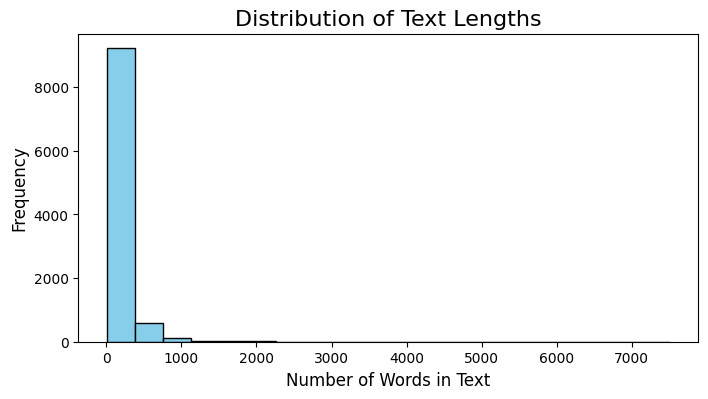

In [38]:
# Check distribution of tweet lengths
balanced_sample['text'] = balanced_sample['text'].astype(str)
balanced_sample['Length'] = balanced_sample['text'].apply(lambda x: len(x.split()))

# Draw histogram
plt.figure(figsize=(8, 4)) 
plt.hist(balanced_sample['Length'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Number of Words in Text', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [32]:
print(balanced_sample['Length'].max())
print(balanced_sample['Length'].min())

7514
2


In [18]:
from wordcloud import WordCloud

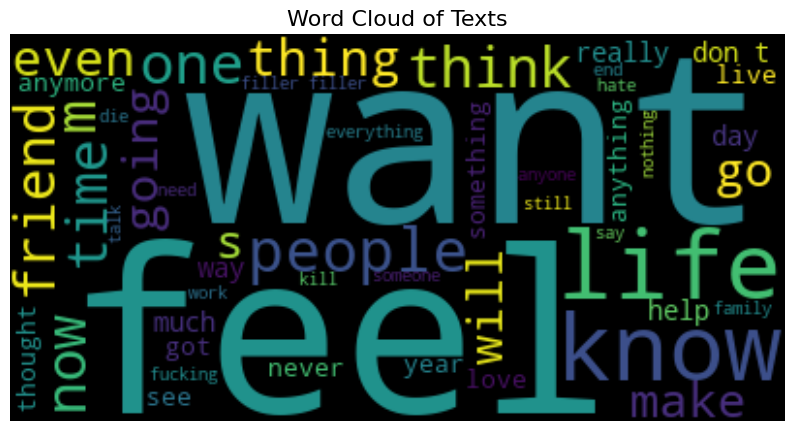

In [37]:
# Visualize Word Cloud of Tweets with top 50 words

from wordcloud import WordCloud
wordcloud = WordCloud(colormap='viridis',
                      background_color='black',
                      max_words=50
                      ).generate(' '.join(balanced_sample['text']))


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smoother display
plt.axis('off')
plt.title('Word Cloud of Texts', fontsize=16)
plt.show()

In [20]:
import nltk
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/sjtok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Quantify proportion of stop words in data

stop_words = set(stopwords.words('english'))
print(stop_words) # Check what words are considered stop words

def stopword_proportion(tweet):
    words = tweet.split()
    stopwords_in_tweet = [word for word in words if word.lower() in stop_words]
    return len(stopwords_in_tweet) / len(words) if len(words) > 0 else 0

balanced_sample['Stopword_Proportion'] = balanced_sample['text'].apply(stopword_proportion)

# Calculate the overall proportion of stopwords in the dataset
overall_stopword_proportion = balanced_sample['Stopword_Proportion'].mean()

print(f"Overall proportion of stopwords in the dataset: {overall_stopword_proportion:.4f}")

{'an', 'nor', 'couldn', 'hasn', 'into', 'my', 'this', 'have', 'the', "aren't", "you'll", 'here', 'below', 'd', "should've", 'doesn', 'to', 'so', 'myself', 'm', 'any', 'those', 'on', 'hadn', 'mustn', 'theirs', 'they', 'once', 'no', 'his', 'did', 'own', 'should', 'mightn', 'were', 'just', 'i', 'again', "she's", 'she', 'of', 'himself', 'doing', 'him', 'by', 'same', 'most', 'has', 'aren', 'hers', 'yours', 'had', 'y', 'weren', 'what', 'your', 'other', 'down', 'themselves', 'through', 'don', "hasn't", 'and', 'being', 've', 'we', 'he', "mightn't", "weren't", 'are', "shouldn't", 'shan', 'their', 'will', 'these', 'whom', 'does', "doesn't", 'having', 'herself', 'at', "it's", 'now', "wouldn't", 'if', 'll', 'its', 'how', 'until', 'when', 'shouldn', 'me', 'you', "don't", 'isn', 'a', "didn't", 'that', 'our', 'with', 'above', 't', 'there', "mustn't", 'such', 'more', 'up', 'ours', 'itself', 'yourself', 'then', "haven't", 'after', 'under', "couldn't", "wasn't", 'her', 'or', 'too', 'during', 'be', 'each

In [23]:
print(balanced_sample.head())

        Unnamed: 0                                               text  \
115543      173612  Why is suicide so hard if what comes after doe...   
33770        50718  How do i politely deal with a guy that’s proba...   
53301        79915  I made a post earlier about how I wanted to br...   
45418        68036  done like 1/3 of my english assignment bruh im...   
111911      168150  As a 2000s kid I can proudly say the number of...   

              class  Contains_Special_Characters  Length  Stopword_Proportion  
115543      suicide                         True     102             0.509804  
33770   non-suicide                         True     223             0.488789  
53301   non-suicide                         True      43             0.534884  
45418   non-suicide                         True      12             0.166667  
111911  non-suicide                        False      27             0.481481  


In [24]:
from collections import Counter

In [25]:
# Separate the dataset by class
not_suicide_df = balanced_sample[balanced_sample['class'] == 'non-suicide']
potential_suicide_df = balanced_sample[balanced_sample['class'] == 'suicide']

In [33]:
# # Check 20 most frequent words in each class

# def tokenize_text(text):
#     # Remove any non-alphanumeric characters (this can be adjusted)
#     text = re.sub(r'[^A-Za-z0-9\s]', '', text.lower())
#     return text.split()

# # Function to get the top 20 words for a class
# def get_20_words_from_counter(dataframe):
#     # Tokenize each tweet and flatten the list of tokens
#     all_words = [word for tweet in dataframe['text'] for word in tokenize_text(tweet)]
    
#     word_counts = Counter(all_words)
#     return word_counts.most_common(20)

# # Get the top 20 words for each class
# not_suicide_top_words = get_20_words_from_counter(not_suicide_df)
# potential_suicide_top_words = get_20_words_from_counter(potential_suicide_df)

# print("Top 20 words for 'Not Suicide post':")
# print(not_suicide_top_words)
# print("\nTop 20 words for 'Potential Suicide post':")
# print(potential_suicide_top_words)
from nltk.corpus import stopwords
import re
from collections import Counter

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize text and exclude stopwords
def tokenize_text(text):
    # Remove any non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^A-Za-z0-9\s]', '', text.lower())
    # Split into words and exclude stopwords
    return [word for word in text.split() if word not in stop_words]

# Function to get the top 20 words for a class
def get_20_words_from_counter(dataframe):
    # Tokenize each tweet and flatten the list of tokens
    all_words = [word for tweet in dataframe['text'] for word in tokenize_text(tweet)]
    
    # Count word frequencies
    word_counts = Counter(all_words)
    return word_counts.most_common(20)

# Get the top 20 words for each class
not_suicide_top_words = get_20_words_from_counter(not_suicide_df)
potential_suicide_top_words = get_20_words_from_counter(potential_suicide_df)

# Print the results
print("Top 20 words for 'Not Suicide post':")
print(not_suicide_top_words)
print("\nTop 20 words for 'Potential Suicide post':")
print(potential_suicide_top_words)



Top 20 words for 'Not Suicide post':
[('im', 2796), ('like', 2103), ('filler', 1803), ('dont', 1447), ('get', 1124), ('know', 1059), ('people', 925), ('one', 889), ('want', 861), ('really', 797), ('time', 755), ('day', 750), ('would', 695), ('feel', 632), ('got', 611), ('even', 597), ('think', 595), ('good', 565), ('friends', 550), ('go', 535)]

Top 20 words for 'Potential Suicide post':
[('im', 12399), ('dont', 7905), ('like', 5734), ('want', 5549), ('life', 4895), ('feel', 4812), ('know', 4556), ('ive', 4236), ('cant', 4115), ('get', 3798), ('even', 3381), ('people', 3176), ('would', 3114), ('one', 3079), ('time', 2991), ('really', 2887), ('going', 2593), ('think', 2546), ('never', 2450), ('go', 2304)]


In [35]:
# Get the top 20 words for each class
not_suicide_top_words = get_20_words_from_counter(not_suicide_df)
potential_suicide_top_words = get_20_words_from_counter(potential_suicide_df)

# Convert top 20 words to sets for comparison
not_suicide_words = {word for word, _ in not_suicide_top_words}
potential_suicide_words = {word for word, _ in potential_suicide_top_words}

# Find words in suicide class but not in non-suicide class
exclusive_suicide_words = potential_suicide_words - not_suicide_words

# Print results
print("Words in the top 20 of 'Potential Suicide post' but not in 'Not Suicide post':")
print(exclusive_suicide_words)



Words in the top 20 of 'Potential Suicide post' but not in 'Not Suicide post':
{'ive', 'never', 'life', 'cant', 'going'}


In [27]:
# Check missing values
balanced_sample.isnull().sum()

Unnamed: 0                     0
text                           0
class                          0
Contains_Special_Characters    0
Length                         0
Stopword_Proportion            0
dtype: int64

In [28]:
balanced_sample = balanced_sample.dropna()
balanced_sample.head()

,Unnamed: 0,text,class,Contains_Special_Characters,Length,Stopword_Proportion
115543,173612,Why is suicide so hard if what comes after doe...,suicide,True,102,0.509804
33770,50718,How do i politely deal with a guy that’s proba...,non-suicide,True,223,0.488789
53301,79915,I made a post earlier about how I wanted to br...,non-suicide,True,43,0.534884
45418,68036,done like 1/3 of my english assignment bruh im...,non-suicide,True,12,0.166667
111911,168150,As a 2000s kid I can proudly say the number of...,non-suicide,False,27,0.481481


# Export CSV

In [29]:
# df.to_csv('tweets_preprocessed2.csv', index=False)

import pandas as pd

# # Sample 5,000 rows from each class
# sampled_non_suicide = df[df['class'] == 'non-suicide'].sample(n=5000, random_state=42)
# sampled_suicide = df[df['class'] == 'suicide'].sample(n=5000, random_state=42)

# # Combine the two samples into a single DataFrame
# balanced_sample = pd.concat([sampled_non_suicide, sampled_suicide])

# # Shuffle the combined DataFrame to mix the classes
# balanced_sample = balanced_sample.sample(frac=1, random_state=42)

# Save the sampled DataFrame to a CSV file
# balanced_sample.to_csv('tweets_preprocessed2.csv', index=False)

